#<b>Malaria Detection in Red Blood Cell Images

##<b>Problem Definition</b>
### **Context:** 
Malaria is an infectious disease cause by **plasmodium parasites** that are typically transmitted to humans by bites from an infected female Anopheles mosquitoes. These parasites will enter the blood and begin to damage the red blood cells (RBCs) that carry oxygen. This results in respiratory distress as well as other major complications, and can eventually result in death.  These lethal parasites can live in the bloodstream for over a year without the infected individual showing any symptoms.  As a result of this long timeline, late treatment can result in severe complications, failure for treatment, and eventually death.

Almost 50% of the world's population is still at risk of contracting the disease, with more than 229 million malaria cases and 400,000 malaria related deaths reported in 2019. Young children, under age 5, are the most vulnerable group in the population, accounting for 67% of these deaths in 2019.

### **Problem Formulation:**

A traditional diagnosis of malaria requires tedious and time consuming laboratory time dedicated to careful inspection of a blood sample by an experienced professional.  After this commitment, the accuracy of the diagnosis can still be impacted by the level of expertise and inter-observer variability.

The idea is to develop an automated system that can help with the early and accurate detection and diagnosis of malaria.  Other applications of classification techniques using Machine Learning have consistently shown high accuracy when handling imaging, much higher than manual classification.  With this being the case, it would be highly beneficial to develop a method that performs malaria detection using a **Deep Learning Algorithm**.

### **Objectives:** 

The goal of this project is the construction of an efficient computer vision model that can be used to detect malaria.  The model should be able to accurately identify whether an image of a red blood cell is infected with malaria or not, classifying the image as **parasitized** or **uninfected**, respectively.

### **Key Questions:**

What methods could we use to detect which cells have foreign bodies on them in the first place?

We need to find some approaches to tackle the problem at hand.  The OpenCV library supplies imaging tools that are very useful in machine learning algorithms.  Perhaps some of these tools could prove useful once we begin the construction of our model.

Which of these tools could be useful to detect these foreign bodies?

How do we define a good model? What would make the model successful?

## <b>Data Description </b>

There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:

**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria.

**Uninfected:** The uninfected cells are free of the Plasmodium parasites.


###<b> Mounting the Drive

In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### <b>Loading libraries</b>

In [ ]:
# Import libraries required to load the data
import zipfile
import os
from PIL import Image

# Import data manipulation libraries
import numpy as np
import pandas as pd
# Import data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import testing and scaling libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Import Deep Learning libararies
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU, GlobalAvgPool2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. This helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

### Importing the data

In [ ]:
# Store the path of the zipped data file from Google drive
path = '/content/drive/MyDrive/cell_images.zip'

# Since the data is provided as a zip file, we need to extract the files
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

The files have been extracted to the local session of Google Colab. The extracted folder would have the following structure:

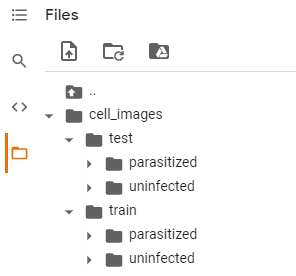

The extracted folder has different folders for training and testing data which further contains separate folders different sizes of images for both parasitized and uninfected cells. 

When working with our **Convolutional Nueral Network (CNN)**, the size of all of the images must be the same and should be converted to 4D arrays so that they can be used as an input for the CNN. We will also need to create the labels for both types of images to be able to train and test the model. 

We will begin by setting up the training data first and then we will use the same code for the testing data.

In [ ]:
# Store the path of the extracted "train" folder 
train_dir = '/content/cell_images/train'

# Set a static size for the images so that each image has the same size
SIZE = 64

# Initialize a list to store the training images after they are converted to NumPy arrays
train_images = []

# Initialize a list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [ ]:
# Treat both "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    # Image path with directory and folder name
    images_path = os.listdir(train_dir + folder_name)

    # For every image in the path
    for i, image_name in enumerate(images_path):
        try:
            # Open the image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            # Resize the image to a square image of the static size
            image = image.resize((SIZE, SIZE))

            # Convert the image to a NumPy array and append that array to the empty list of training images
            train_images.append(np.array(image))

            # Create labels for parasitized and uninfected images based on folder name
            if folder_name=='/parasitized/':
                train_labels.append(1)
            else:
                train_labels.append(0)
        except Exception:
            pass       

# Convert the created lists to NumPy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

Now we will create the testing data array with a similar process.

In [ ]:
# Store the path of the extracted "test" folder 
test_dir = '/content/cell_images/test'

# Initialize a list to store the testing images after they are converted to NumPy arrays
test_images = []

# Initialize a list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [ ]:
# Treat both "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    # Image path with directory and folder name
    images_path = os.listdir(test_dir + folder_name)

    # For every image in the path
    for i, image_name in enumerate(images_path):
        try:
            # Open the image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)
            
            # Resize the image to a square image of the static size
            image = image.resize((SIZE, SIZE))
            
            # Convert the image to a NumPy array and append that array to the empty list of testing images
            test_images.append(np.array(image))
            
            # Create labels for parasitized and uninfected images based on folder name
            if folder_name=='/parasitized/':
                test_labels.append(1)
            else:
                test_labels.append(0)
        except Exception:
            pass       

# Convert the created lists to NumPy arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

###<b> Checking the shape of train and test images

In [ ]:
# Print the shape of the images
print(train_images.shape)
print(test_images.shape)

(24958, 64, 64, 3)
(2600, 64, 64, 3)


###<b> Checking the shape of train and test labels

In [ ]:
# Print the shape of the labels 
print(train_labels.shape)
print(test_labels.shape)

(24958,)
(2600,)


**Observations:**
- We have `24958` training images and `2600` testing images of size 64x64 in color (RGB takes 3 dimensions).
- We also have  `24958` training labels and `2600` testing labels.
- Since all of the images for the training and testing data are the same dimensions, we are ready to move forward.

### <b>Check the minimum and maximum range of pixel values for train and test images

In [ ]:
# Check the min and max pixel values in the training images array
print("Training min: " + str(np.min(train_images)))
print("Training max: " + str(np.max(train_images)))
# Check the min and max pixel values in the testing images array
print("Testing min: " + str(np.min(test_images)))
print("Testing max: " + str(np.max(test_images)))

Training min: 0
Training max: 255
Testing min: 0
Testing max: 255


**Observations:**
- The range of values for each red, green, or blue aspect of the pixels is `0-255`.  We will need to normalize these values eventually to scale them to the same range as the categorical values in the label data.

###<b> Count the number of values in both uninfected and parasitized 

In [ ]:
# Obtain a count of the number of healthy/parasitized images in each dataset
train_healthy_count, train_para_count = np.bincount(train_labels)
test_healthy_count, test_para_count = np.bincount(test_labels)
print("*************** Training Data ***************")
print("Number of Healthy RBC Images: " + str(train_healthy_count))
print("Number of Parasitized RBC Images: " + str(train_para_count))
print("*************** Testing Data ****************")
print("Number of Healthy RBC Images: " + str(test_healthy_count))
print("Number of Parasitized RBC Images: " + str(test_para_count))

*************** Training Data ***************
Number of Healthy RBC Images: 12479
Number of Parasitized RBC Images: 12479
*************** Testing Data ****************
Number of Healthy RBC Images: 1300
Number of Parasitized RBC Images: 1300


###<b>Normalize the images

In [ ]:
# Normalize the training and testing images by dividing it by 255 and then convert the values to float32 using astype function
train_images_normal = (train_images/255.0).astype('float32')
test_images_normal = (test_images/255.0).astype('float32')

# Check the min and max pixel values in the training images array after normalization
print("Training normalized min: " + str(np.min(train_images_normal)))
print("Training normalized max: " + str(np.max(train_images_normal)))
# Check the min and max pixel values in the testing images array after normalization
print("Testing normalized min: " + str(np.min(test_images_normal)))
print("Testing normalized max: " + str(np.max(test_images_normal)))

Training normalized min: 0.0
Training normalized max: 1.0
Testing normalized min: 0.0
Testing normalized max: 1.0


**Observations:**
- Now that we have normalized the image vectors, the pixel component values range from `0.0 - 1.0`.
- We also have an even split between parasitized and healthy images in both the training and testing datasets.

### **Plot to verify the data is balanced**

It's important to have a good spread of images within each category.  Let's plot the category counts for both the testing and training data to ensure that we have a good balance of images in each set.

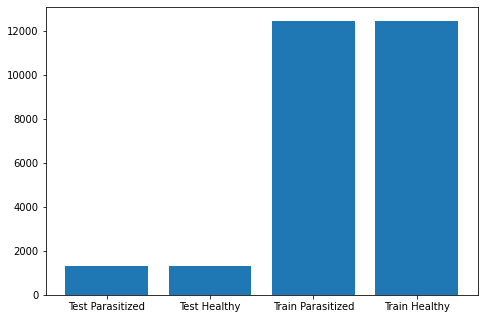

In [ ]:
# Plot data category counts to ensure we have a good balance of images in each set
categories = ['Test Parasitized', 'Test Healthy', 'Train Parasitized', 'Train Healthy']
counts = [test_para_count, test_healthy_count, train_para_count, train_healthy_count]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(categories, counts)
plt.show()

**Observations:**
- It seems that we have a pretty even spread of parasitized and uninfected RBC images in both the training image set and testing image set.

### <b>Data Exploration</b>

Now that we have structured our image and label data in a way that makes it easy to work with, let's develop some insights on the data both visually and numerically.

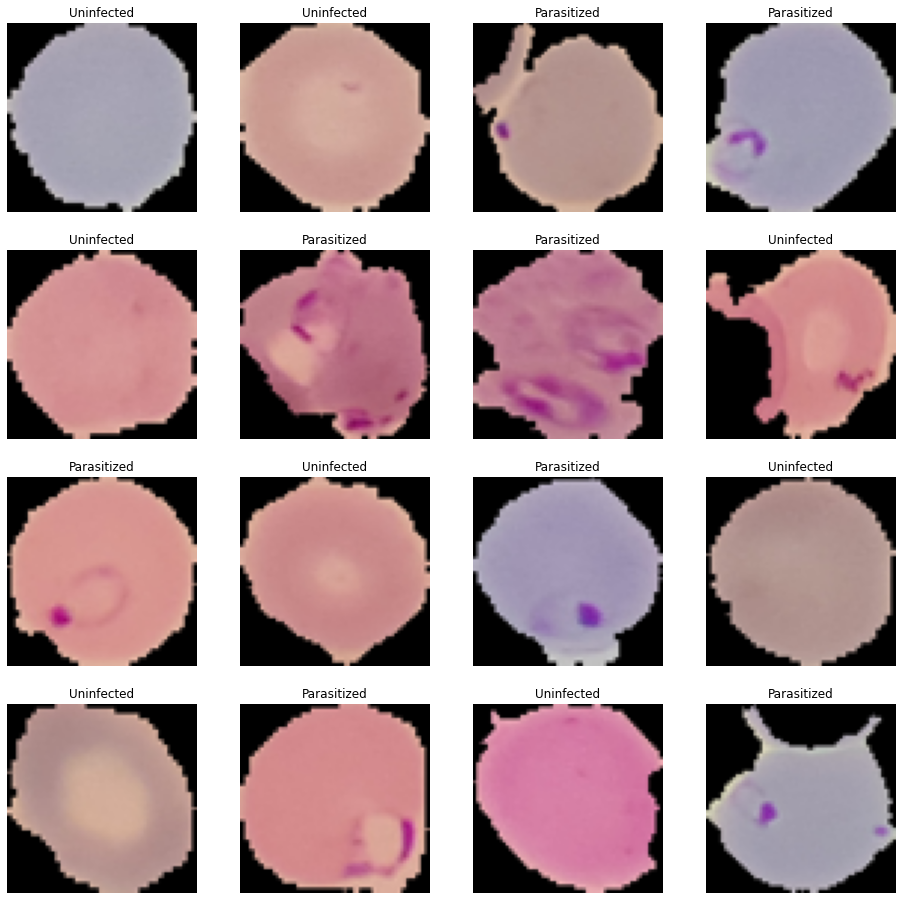

In [ ]:
# Set the seed for random number generators for repeatability
np.random.seed(42)

# Create a 16in by 16in figure
plt.figure(1 , figsize = (16, 16))

# Add 16 random images and their corresponding labels from the training data to the figure
for n in range(1, 17):
    plt.subplot(4, 4, n)
    index = int(np.random.randint(0, train_images_normal.shape[0], 1))
    if train_labels[index] == 1: 
        plt.title('Parasitized')
    else:
        plt.title('Uninfected')
    plt.imshow(train_images_normal[index])
    plt.axis('off')

**Observations:**
- We can see many different shapes, sizes, and colors of RBCs in the training data.
- We can see a number of different sizes of parasites, indicating that we have image data from various stages of infection as well, which should help build an accurate model for both early and late detection.
- Within each of those categories we also see a relatively even dispersal of parasitized/uninfected cells.

Let's view a few more images to see if we can gather any other useful information.

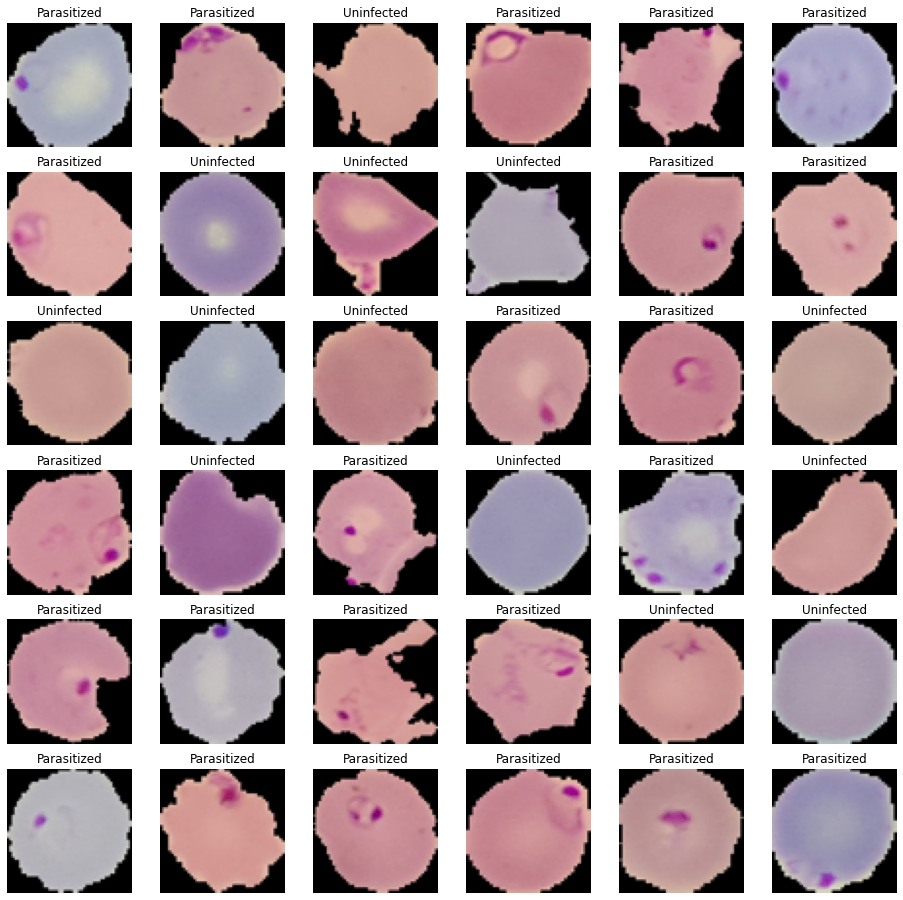

In [ ]:
# Create a 16in by 16in figure
plt.figure(1 , figsize = (16, 16))

# Add 36 random images and their corresponding labels from the training data to the figure
for n in range(1, 37):
    plt.subplot(6, 6, n)
    index = int(np.random.randint(0, train_images_normal.shape[0], 1))
    if train_labels[index] == 1: 
        plt.title('Parasitized')
    else:
        plt.title('Uninfected')
    plt.imshow(train_images_normal[index])
    plt.axis('off')


**Observations:**
- It looks like we also have a good selection of images with abnormal cell shapes as well.
- There seem to be plenty of cells with what looks like early stages of infection as well as cells with extreme/late stages of infection.

###<b> Plotting the mean images for parasitized and uninfected

In [ ]:
# Define a function to find the mean image of a set
def find_mean_img(full_mat, title):
    # Calculate the mean image
    mean_img = np.mean(full_mat, axis = 0)[0]
    # Plot the mean image
    plt.imshow(mean_img)
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    # Return the mean image array
    return mean_img

<b> Mean image for parasitized cell data

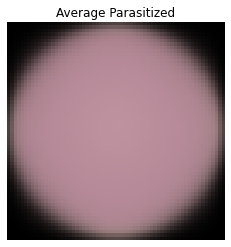

In [ ]:
# Create a list that contains only the parasitized RBC images
parasitized_data = []
for img, label in zip(train_images_normal, train_labels):
    if label==1:
        parasitized_data.append([img])
# Find the mean parasitized image
parasitized_mean = find_mean_img(np.array(parasitized_data), 'Parasitized')

<b> Mean image for uninfected cell data

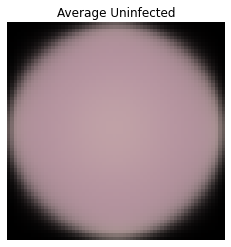

In [ ]:
# Create a list that contains only the uninfected RBC images
uninfected_data = []
for img, label in zip(train_images_normal, train_labels):
    if label==0:
        uninfected_data.append([img])
# Find the mean parasitized image
uninfected_mean = find_mean_img(np.array(uninfected_data), 'Uninfected')

**Observations:**
- Both of the mean images are very smooth and round with an even color.
- One thing to notice is that the average Parasitized cell happens to be a shade darker than the average Uninfected cell.  This makes sense, as the parasites seemed to have been dark spots on the RBCs in the sample images that we observed earlier.

### <b>Converting RGB to HSV of Images using OpenCV

**OpenCV (Open Source Computer Vision Library)** is an open source **computer vision and machine learning software library**. The library contains a large bank of optimized algorithms, which includes a comprehensive set of both computer vision and machine learning algorithms. These algorithms can be used to detect and recognize faces, identify objects, classify human actions in videos, track camera movements, track moving objects, extract 3D models of objects, etc.  More information on OpenCV can be found [here](https://opencv.org/about/).

OpenCV could potentially aid us in the detection of foreign objects on the red blood cells, i.e. the parasites that indicate malaria infection. We have seen these objects already in previous images.  Before we detect these foreign objects, the first thing we will need to do is convert the RGB color values in the training and testing image sets to HSV color values. The reason we do this is because the HSV color space is better for object detection and color based image segmentation.

The HSV color space consists of 3 matrices representing `hue`, `saturation`, and `value`. In OpenCV the value range for `hue`, `saturation` and `value` are respectively `0-179`, `0-255` and `0-255`. `Hue` represents the color, `saturation` represents the amount to which that respective color is mixed with white, and `value` represents the amount to which that respective color is mixed with black.

####<b> Converting the training data

Let's first convert the training data to an HSV color scheme.

In [ ]:
# Import OpenCV libraries for computer vision
import cv2
# Initialize HSV list
train_HSV = []
# Convert the RGB coloring of the training images to HSV
for i in np.arange(0, train_labels.shape[0], 1):
    a = cv2.cvtColor(train_images_normal[i], cv2.COLOR_BGR2HSV)
    train_HSV.append(a)
# Convert the image list to a NumPy array
train_HSV = np.array(train_HSV)
print("Shape of the HSV training data: " + str(train_HSV.shape))

Shape of the HSV training data: (24958, 64, 64, 3)


Now that we have converted the training image set to an HSV color scheme, it would be useful to observe some of these changes.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


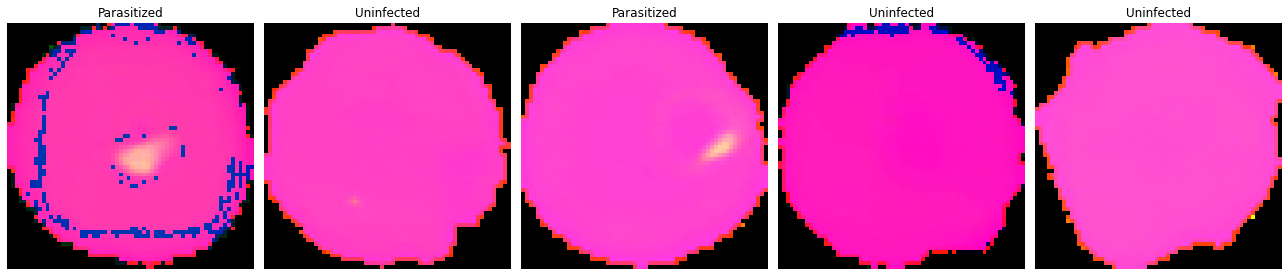

In [ ]:
# Select 5 random images and create a subplot
viewimage = np.random.randint(1, train_labels.shape[0], 5)
fig, ax = plt.subplots(1, 5, figsize=(18, 18))
# Plot the subplots in a figure along with their health status
for t,i in zip(range(5), viewimage):
    if train_labels[i] == 1: 
        title = 'Parasitized'
    else:
        title = 'Uninfected'
    ax[t].set_title(title)
    ax[t].imshow(train_HSV[i])
    ax[t].set_axis_off()
    fig.tight_layout()

<b> Mean image for parasitized cell data in HSV color space

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


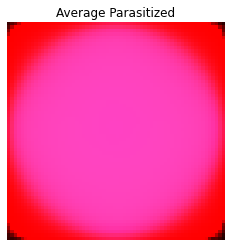

In [ ]:
# Create a list that contains only the parasitized RBC images
parasitized_hsv = []
for img, label in zip(train_HSV, train_labels):
    if label==1:
        parasitized_hsv.append([img])
# Find the mean parasitized image
parasitized_hsv_mean = find_mean_img(np.array(parasitized_hsv), 'Parasitized')

<b> Mean image for uninfected cell data in HSV color space

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


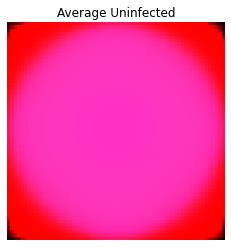

In [ ]:
# Create a list that contains only the uninfected RBC images
uninfected_hsv = []
for img, label in zip(train_HSV, train_labels):
    if label==0:
        uninfected_hsv.append([img])
# Find the mean parasitized image
uninfected_hsv_mean = find_mean_img(np.array(uninfected_hsv), 'Uninfected')

**Observations:**
- There does not seem to be any apparent difference in the mean images for each subset of the HSV data.

####<b> Converting the test data

Now we will convert the testing image set to HSV.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Shape of the HSV testing data: (2600, 64, 64, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


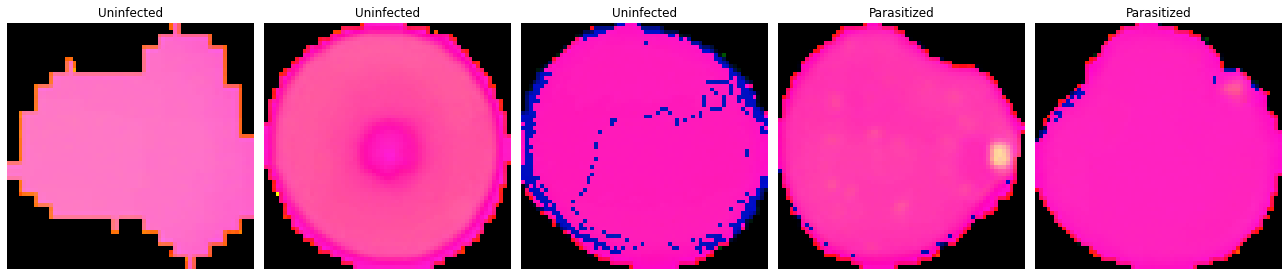

In [ ]:
# Initialize HSV list
test_HSV = []
# Convert the RGB coloring of the testing images to HSV
for i in np.arange(0, test_labels.shape[0], 1):
    a = cv2.cvtColor(test_images_normal[i], cv2.COLOR_BGR2HSV)
    test_HSV.append(a)
# Convert the image list to a NumPy array
test_HSV = np.array(test_HSV)
print("Shape of the HSV testing data: " + str(test_HSV.shape))

# Select 5 random images and create a subplot
viewimage = np.random.randint(1, test_labels.shape[0], 5)
fig, ax = plt.subplots(1, 5, figsize=(18, 18))
# Plot the subplots in a figure along with their health status
for t,i in zip(range(5), viewimage):
    if test_labels[i] == 1: 
        title = 'Parasitized'
    else:
        title = 'Uninfected'
    ax[t].set_title(title)
    ax[t].imshow(test_HSV[i])
    ax[t].set_axis_off()
    fig.tight_layout()

**Observations:**
- As we can see in the sample images from both the training and testing data, the color shift from the earlier image samples is very drastic to the human eye.
- We can also see that the parasitized cells have yellow-ish markings/spots somewhere on the RBCs.
- There seem to be dark purple spots that show up on some of the cells. This could potentially cause some issues with this image set once we attempt to train foreign object detection.  We will need to keep this in mind.
- With this in mind, we can now use these HSV image sets to help train our Deep Learning algorithms to detect a malaria infection in the cells.

###<b> Processing Images using Gaussian Blurring using OpenCV

In image processing, a **Gaussian Blur** (also known as Gaussian smoothing) is the result of blurring an image by the use of a Gaussian function. It is a widely used effect in graphics software, and is typically used to reduce image noise and reduce overall detail. The visual effect of this blurring technique is a smooth blur resembling that of viewing the image through a translucent screen or fogged glass. Gaussian Blur is also useful as a pre-processing stage in computer vision algorithms in order to enhance image structures at different scales.

Gaussian smoothing is commonly used with edge detection, as most edge detection algorithms are sensitive to certain levels of noise. Using a Gaussian Blur filter before edge detection helps to reduce the level of noise in the image, which improves the results of the following edge-detection algorithm.  Since the original image set seems to have some sharp perturbations in some of the images and an overall "pixelated" look, perhaps this feature could be useful in training a computer to recognize the hard shifts (i.e. edges) that divide the parasites in the RBC images from the RBCs themselves.

####<b> Gaussian Blurring on training data

Let's begin by blurring the training image set.

In [ ]:
# Initialize the Gaussian Blurring training data list
train_blur = []
# Blur the training images and append them to the blurred list
for i in np.arange(0, train_labels.shape[0], 1):
    blur = cv2.GaussianBlur(train_images_normal[i], (5, 5), 0)
    train_blur.append(blur)
# Reconstruct the blurred training image list into a NumPy array
train_blur = np.array(train_blur)
print("Shape of the blurred training data: " + str(train_blur.shape))

Shape of the blurred training data: (24958, 64, 64, 3)


Now that we have blurred the images, it would be helpful to see how this has had an effect on the images.

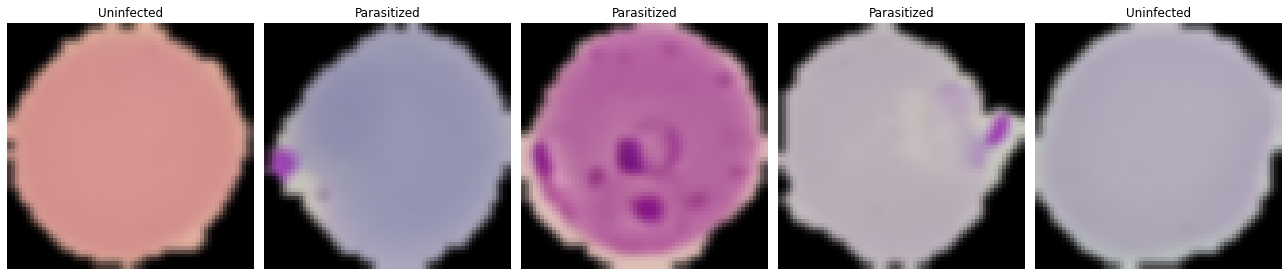

In [ ]:
# Select 5 random images from the blurred image set to view and create the subplots
viewimage = np.random.randint(1, train_labels.shape[0], 5)
fig, ax = plt.subplots(1, 5, figsize=(18,18))
# Plot the subplots in a figure along with their health status
for t,i in zip(range(5), viewimage):
    if train_labels[i] == 1: 
        title = 'Parasitized'
    else:
        title = 'Uninfected'
    ax[t].set_title(title)
    ax[t].imshow(train_blur[i])
    ax[t].set_axis_off()
    fig.tight_layout()

<b> Mean image for parasitized cell data after performing Gaussian Blurring

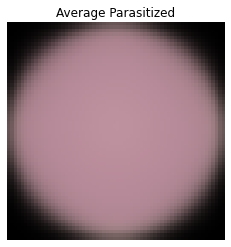

In [ ]:
# Create a list that contains only the parasitized RBC images
parasitized_blur = []
for img, label in zip(train_blur, train_labels):
    if label==1:
        parasitized_blur.append([img])
# Find the mean parasitized image
parasitized_blur_mean = find_mean_img(np.array(parasitized_blur), 'Parasitized')

<b> Mean image for uninfected cell data after performing Gaussian Blurring

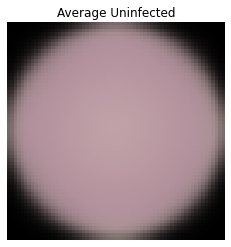

In [ ]:
# Create a list that contains only the uninfected RBC images
uninfected_blur = []
for img, label in zip(train_blur, train_labels):
    if label==0:
        uninfected_blur.append([img])
# Find the mean parasitized image
uninfected_blur_mean = find_mean_img(np.array(uninfected_blur), 'Uninfected')

**Observations:**
- As we saw in the earlier mean image set on the unaltered training data, there seems to be a slightly darker shade in the average parasitized mean image.

####<b> Gaussian Blurring on testing data

Now we can repeat the same process on the testing data.

Shape of the blurred testing data: (2600, 64, 64, 3)


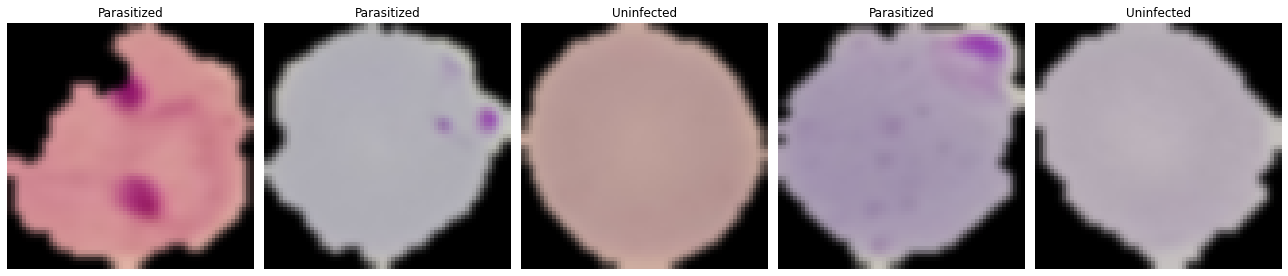

In [ ]:
# Initialize the Gaussian Blurring training data list
test_blur = []
# Blur the testing images and append them to the blurred list
for i in np.arange(0, test_labels.shape[0], 1):
    blur = cv2.GaussianBlur(test_images_normal[i], (5, 5), 0)
    test_blur.append(blur)
# Reconstruct the blurred training image list into a NumPy array
test_blur = np.array(test_blur)
print("Shape of the blurred testing data: " + str(test_blur.shape))

# Select 5 random images from the blurred image set to view and create the subplots
viewimage = np.random.randint(1, test_labels.shape[0], 5)
fig, ax = plt.subplots(1, 5, figsize=(18,18))
# Plot the subplots in a figure along with their health status
for t,i in zip(range(5), viewimage):
    if test_labels[i] == 1: 
        title = 'Parasitized'
    else:
        title = 'Uninfected'
    ax[t].set_title(title)
    ax[t].imshow(test_blur[i])
    ax[t].set_axis_off()
    fig.tight_layout()

**Observations:**
- This method seems like it has removed some of the noise from the images, drawing much more attention to the drastic shift in color from the RBC bodies to the dark colored parasites in the images.
- It seems to smooth out some of the impurities in some of the original image set, which has the effect of pushing these impurities out of focus.
- This image set could prove useful in detecting the foreign parasitic bodies that have attached themselves to the cells.

## **Proposed approach**

**Potential techniques:**
- We have defined a few imaging algorithms that help prepare the images for processing.  We can explore which of these algorithms discussed, if not others as well, to potentially create a useful model.
-  We will also need to experiment with different structures of the Convolutional Neural network that will make up our model.

**Overall solution design:**
- We could use any of the algorithms discussed to aid in the construction of our model.
- It may also be possible to combine the imaging algorithms discussed to achieve better results.
- We already have the training and testing data sets, perhaps a validation set may also be useful when constructing our model to ensure accuracy when training the model, in preparation for testing.

**Measures of success:**
- To define a successful algorithm, especially when it comes to patient health and early detection of infection, it would be extremely important for this model to be as accurate as possible.
- We already have the training and testing data sets, perhaps a validation set may also be useful when constructing our model.

#<b> Creating the Models

###<B>One Hot Encoding on the train and test labels

In [ ]:
# Construct a one-hot encoding of the training Labels
train_labels_encoded = to_categorical(train_labels)
# Similarly encode testing labels
test_labels_encoded = to_categorical(test_labels)

# Modify the train and test data to use OpenCV preprocessed images
# HSV color scheme:
#train_images = train_HSV
#test_images = test_HSV
# Gaussian blur:
#train_images = train_blur
#test_images = test_blur

In [ ]:
print(train_labels)
print(train_labels_encoded)

[1 1 1 ... 0 0 0]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


### **Base Model**

**Note:** The Base Model has been fully built and evaluated with all outputs shown to give an idea about the process of the creation and evaluation of the performance of a CNN architecture. A similar process can be followed in iterating to build better-performing CNN architectures.

####<b> Importing the required libraries

In [ ]:
# Library for clearing backend
from tensorflow.keras import backend

# Modeling libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout  
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from random import shuffle

# Clear the backend session
backend.clear_session()
# Fix the seed for random number generators for repeatability
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

####<b> Building the model

In [ ]:
# Create a sequential model
model = Sequential()
# Add a convolutional input layer with 32 neurons and a RELU activation function
model.add(Conv2D(filters=32, kernel_size=2, padding="same", activation="relu", input_shape=(64,64,3)))
# Add a Max Pooling layer
model.add(MaxPooling2D(pool_size=2))
# Set a 20% neuron dropout to avoid overfitting
model.add(Dropout(0.2))
# Add a convolutional layer with 32 neurons and a RELU activation function
model.add(Conv2D(filters=32, kernel_size=2, padding="same", activation="relu"))
# Add a Max Pooling layer
model.add(MaxPooling2D(pool_size=2))
# Set a 20% neuron dropout to avoid overfitting
model.add(Dropout(0.2))
# Add a convolutional layer with 32 neurons and a RELU activation function
model.add(Conv2D(filters=32, kernel_size=2, padding="same", activation="relu"))
# Add a Max Pooling layer
model.add(MaxPooling2D(pool_size=2))
# Set a 20% neuron dropout to avoid overfitting
model.add(Dropout(0.2))

# Add a layer to flatten the output thus far
model.add(Flatten())

# Add a Dense layer with 512 neurons and a RELU activation function
model.add(Dense(512, activation="relu"))
# Add a 40% dropout to avoid overfitting
model.add(Dropout(0.4))
# Add a Dense output layer with 2 categories of output using the softmax activation function
model.add(Dense(2, activation="softmax"))

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4128      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        4

####<b> Compiling the model

In [ ]:
# Compile the model using a binary_crossentropy loss function, the Adam optimizer and set our metric to accuracy
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

<b> Using Callbacks 

In [ ]:
# Set up callbacks for early stopping and checkpoints while monitoring the validation loss
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

<b> Fit and train our Model

In [ ]:
# Fit the model with a min batch size of 32, we can tune the batch size to some factor of 2^x
# Utilize a validation split of 20% and use 20 epochs
history = model.fit(train_images,
                    train_labels_encoded,
                    batch_size=32,
                    callbacks=callbacks,
                    validation_split=0.2,
                    epochs=20,
                    verbose=1)

Epoch 1/20
624/624 [==============================] - 38s 13ms/step - loss: 1.5433 - accuracy: 0.6117 - val_loss: 0.6476 - val_accuracy: 0.7516
Epoch 2/20
624/624 [==============================] - 7s 12ms/step - loss: 0.5973 - accuracy: 0.6807 - val_loss: 0.6076 - val_accuracy: 0.8978
Epoch 3/20
624/624 [==============================] - 7s 12ms/step - loss: 0.2607 - accuracy: 0.9075 - val_loss: 0.2048 - val_accuracy: 0.9325
Epoch 4/20
624/624 [==============================] - 8s 12ms/step - loss: 0.1805 - accuracy: 0.9372 - val_loss: 0.2669 - val_accuracy: 0.9317
Epoch 5/20
624/624 [==============================] - 7s 12ms/step - loss: 0.1603 - accuracy: 0.9480 - val_loss: 0.1765 - val_accuracy: 0.9639
Epoch 6/20
624/624 [==============================] - 7s 12ms/step - loss: 0.1564 - accuracy: 0.9491 - val_loss: 0.1562 - val_accuracy: 0.9631
Epoch 7/20
624/624 [==============================] - 7s 12ms/step - loss: 0.1470 - accuracy: 0.9511 - val_loss: 0.2093 - val_accuracy: 0.954

####<b> Evaluating the model on test data

In [ ]:
# Evaluate the accuracy of the model using the testing data
accuracy = model.evaluate(test_images, test_labels_encoded, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 1s 5ms/step - loss: 0.1561 - accuracy: 0.9508

 Test_Accuracy:- 0.9507692456245422


<b> Plotting the confusion matrix

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1300
           1       0.97      0.93      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



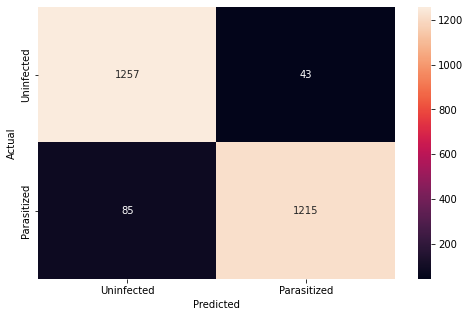

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Use the model to run a prediction on the testing images
pred = model.predict(test_images)
pred = np.argmax(pred, axis = 1) 
y_true = np.argmax(test_labels_encoded, axis = 1)

# Print the classification report
print(classification_report(y_true, pred))

# Plot the heatmap using the confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<b>Plotting the train and validation curves

In [ ]:
# A function to plot the training and validation accuracy 
def plot_accuracy(history):
    N = len(history.history["accuracy"])
    plt.figure(figsize=(7,7))
    plt.plot(np.arange(0, N), history.history["accuracy"], label="train_accuracy", ls='--')
    plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_accuracy", ls='--')
    plt.title("Accuracy vs Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(loc="upper left")

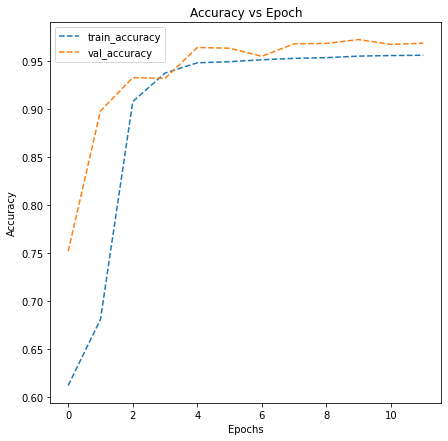

In [ ]:
# Plot the accuracy of the model against the number of epochs
plot_accuracy(history)

**Observations:**

* Here we can clearly observe that the training and valiation accuracy are increasing 
* And we can also notice that validation accuracy is slightly higher than the train accuracy

###<b> Adjusting our Model: Model 1

Now that we have a baseline model, we wish to improve the performance. We will first try to do this by adding new layers to the model.


Now let's try to build another model with few more add on layers and try to check if we can try to improve the model. Therefore try to build a model by adding few layers if required and altering the activation functions.

In [ ]:
# Library for clearing backend
from tensorflow.keras import backend

# Modeling libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout  
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from random import shuffle

# Clear the backend session
backend.clear_session()
# Fix the seed for random number generators for repeatability
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

####<b> Building the Model

Now that we have reset the backend, let's construct our model with a few extra layers and observe the differences in accuracy.

In [ ]:
# Create a sequential model
model1 = Sequential()
# Add a convolutional input layer with 32 neurons and a RELU activation function
model1.add(Conv2D(filters=32, kernel_size=2, padding="same", activation="relu", input_shape=(64,64,3)))
# Add a Max Pooling layer
model1.add(MaxPooling2D(pool_size=2))
# Set a 20% neuron dropout to avoid overfitting
model1.add(Dropout(0.2))
# Add a convolutional layer with 32 neurons and a RELU activation function
model1.add(Conv2D(filters=32, kernel_size=2, padding="same", activation="relu"))
# Add a Max Pooling layer
model1.add(MaxPooling2D(pool_size=2))
# Set a 20% neuron dropout to avoid overfitting
model1.add(Dropout(0.2))
# Add a convolutional layer with 32 neurons and a RELU activation function
model1.add(Conv2D(filters=32, kernel_size=2, padding="same", activation="relu"))
# Add a Max Pooling layer
model1.add(MaxPooling2D(pool_size=2))
# Set a 20% neuron dropout to avoid overfitting
model1.add(Dropout(0.2))
# Add a convolutional layer with 32 neurons and a RELU activation function
model1.add(Conv2D(filters=32, kernel_size=2, padding="same", activation="relu"))
# Add a Max Pooling layer
model1.add(MaxPooling2D(pool_size=2))
# Set a 20% neuron dropout to avoid overfitting
model1.add(Dropout(0.2))
# Add a convolutional layer with 32 neurons and a RELU activation function
model1.add(Conv2D(filters=32, kernel_size=2, padding="same", activation="relu"))
# Add a Max Pooling layer
model1.add(MaxPooling2D(pool_size=2))
# Set a 20% neuron dropout to avoid overfitting
model1.add(Dropout(0.2))

# Add a layer to flatten the output thus far
model1.add(Flatten())

# Add a Dense layer with 512 neurons and a RELU activation function
model1.add(Dense(512, activation="relu"))
# Add a 40% dropout to avoid overfitting
model1.add(Dropout(0.4))
# Add a Dense output layer with 2 categories of output using the softmax activation function
model1.add(Dense(2, activation="softmax"))

# Print the model summary
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4128      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        4

####<b> Compiling the model

In [ ]:
# Compile the model using a binary_crossentropy loss function, the Adam optimizer and set our metric to accuracy
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

<b> Using Callbacks

In [ ]:
# Set up callbacks for early stopping and checkpoints while monitoring the validation loss
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

<b>Fit and Train the model

In [ ]:
# Fit the model with a min batch size of 32, we can tune the batch size to some factor of 2^x
# Utilize a validation split of 20% and use 20 epochs
history1 = model1.fit(train_images,
                      train_labels_encoded,
                      batch_size=32,
                      callbacks=callbacks,
                      validation_split=0.2,
                      epochs=20,
                      verbose=1)

Epoch 1/20
624/624 [==============================] - 9s 13ms/step - loss: 0.7704 - accuracy: 0.6118 - val_loss: 0.8158 - val_accuracy: 0.0000e+00
Epoch 2/20
624/624 [==============================] - 8s 12ms/step - loss: 0.4779 - accuracy: 0.7530 - val_loss: 0.3000 - val_accuracy: 0.9189
Epoch 3/20
624/624 [==============================] - 8s 12ms/step - loss: 0.1905 - accuracy: 0.9401 - val_loss: 0.2165 - val_accuracy: 0.9381
Epoch 4/20
624/624 [==============================] - 8s 12ms/step - loss: 0.1715 - accuracy: 0.9443 - val_loss: 0.1546 - val_accuracy: 0.9599
Epoch 5/20
624/624 [==============================] - 8s 12ms/step - loss: 0.1627 - accuracy: 0.9473 - val_loss: 0.1564 - val_accuracy: 0.9639
Epoch 6/20
624/624 [==============================] - 8s 12ms/step - loss: 0.1604 - accuracy: 0.9487 - val_loss: 0.1667 - val_accuracy: 0.9557


####<b> Evaluating the model

In [ ]:
# Evaluate the accuracy of the new model using the testing data
accuracy1 = model1.evaluate(test_images, test_labels_encoded, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy1[1])

82/82 [==============================] - 1s 6ms/step - loss: 0.1618 - accuracy: 0.9523

 Test_Accuracy:- 0.9523077011108398


<b> Plotting the confusion matrix

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1300
           1       0.96      0.95      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



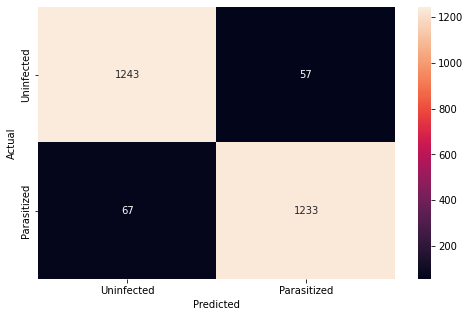

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Use the model to run a prediction on the testing images
pred1 = model1.predict(test_images)
pred1 = np.argmax(pred1, axis = 1) 
y_true = np.argmax(test_labels_encoded, axis = 1)

# Print the classification report
print(classification_report(y_true, pred1))

# Plot the heatmap using the confusion matrix
cm = confusion_matrix(y_true, pred1)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<b> Plotting the Train and validation curves

We have already constructed a function that will plot the accuracy given model history. We can use that here.

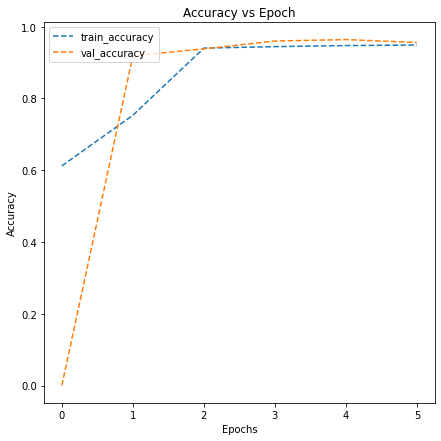

In [ ]:
# Plot the accuracy of the new model against the number of epochs
plot_accuracy(history1)

**Observations:**
- It looks like accuracy of the model was not really improved with the additional layers.
- We are still seeing the validation accuracy rest above the training accuracy.
- We can also see that the callbacks observed a reasonable stopping point after only 8 epochs with this model when compared to the previous model. So with this model we see a faster training rate.

###<b> Adjusting our Model: Model 2 using Batch Normalization

####<b>Think about it:</b><br>
Now let's build a model with LeakyRelu as the activation function  

*  Can the model performance be improved if we change our activation function to LeakyRelu?
*  Can BatchNormalization improve our model?

Let us try to build a model using BatchNormalization and using LeakyRelu as our activation function.

In [ ]:
# Clear the backend
from tensorflow.keras import backend
backend.clear_session()

# Fix the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

####<b> Building the Model

In [ ]:
# Create a sequential model
model2 = Sequential()
# Add a convolutional input layer with 32 neurons and a RELU activation function
model2.add(Conv2D(32, (3,3), input_shape=(64, 64, 3), padding='same'))
# Add a leaky relu activation function with negative slope of 0.1
model2.add(LeakyReLU(0.1))
# Adding max pooling to reduce the size of output of second conv layer
model2.add(MaxPool2D(pool_size=(2, 2)))
# Adding a Batch normalization layer
model2.add(BatchNormalization())
# Set a 20% neuron dropout to avoid overfitting
model2.add(Dropout(0.2))

# Add a second convolutional layer with 32 filters and with kernel size 3x3
model2.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
# Add a leaky relu activation function with negative slope of 0.1
model2.add(LeakyReLU(0.1))
# Adding max pooling to reduce the size of output of second conv layer
model2.add(MaxPool2D(pool_size=(2, 2)))
# Adding a Batch normalization layer
model2.add(BatchNormalization())
# Add a dropout to randomly switch off 20% neurons to reduce overfitting
model2.add(Dropout(0.2))

# Add a third convolutional layer with 32 filters and with kernel size 3x3
model2.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
# Add a leaky relu activation function with negative slope of 0.1
model2.add(LeakyReLU(0.1))
# Adding max pooling to reduce the size of output of second conv layer
model2.add(MaxPool2D(pool_size=(2, 2)))
# Adding a Batch normalization layer
model2.add(BatchNormalization())
# Add a dropout to randomly switch off 20% neurons to reduce overfitting
model2.add(Dropout(0.2))

# Add a fourth convolutional layer with 32 filters and with kernel size 3x3
model2.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
# Add a leaky relu activation function with negative slope of 0.1
model2.add(LeakyReLU(0.1))
# Adding max pooling to reduce the size of output of second conv layer
model2.add(MaxPool2D(pool_size=(2, 2)))
# Adding a Batch normalization layer
model2.add(BatchNormalization())
# Add a dropout to randomly switch off 20% neurons to reduce overfitting
model2.add(Dropout(0.2))

# Add a layer to flatten the output thus far
model2.add(Flatten())

# Add a Dense layer with 512 neurons and a RELU activation function
model2.add(Dense(512))
# Add a leaky relu activation function with negative slope of 0.1
model2.add(LeakyReLU(0.1))
# Add a 40% dropout to avoid overfitting
model2.add(Dropout(0.4))
# Add a Dense output layer with 2 categories of output using the softmax activation function
model2.add(Dense(2, activation="softmax"))
# Use the adam optimizer with a learning rate of 0.001
adam = optimizers.Adam(learning_rate=0.001)

# Print the model summary
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 32)        0

####<b>Compiling the model

In [ ]:
# Compile the model using binary crossentropy and the adam optimizer and accuracy metric
model2.compile(loss="binary_crossentropy", optimizer='adam', metrics = ['accuracy'])

<b> Using callbacks

In [ ]:
# Set up callbacks for early stopping and checkpoints while monitoring the validation loss
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

<b>Fit and train the model

In [ ]:
history2 = model2.fit(train_images,
                      train_labels_encoded,
                      batch_size=32,
                      callbacks=callbacks,
                      validation_split=0.2,
                      epochs=20,
                      verbose=1)

Epoch 1/20
624/624 [==============================] - 10s 15ms/step - loss: 0.2753 - accuracy: 0.8893 - val_loss: 0.1100 - val_accuracy: 0.9756
Epoch 2/20
624/624 [==============================] - 9s 14ms/step - loss: 0.1592 - accuracy: 0.9488 - val_loss: 0.2063 - val_accuracy: 0.9385
Epoch 3/20
624/624 [==============================] - 9s 14ms/step - loss: 0.1498 - accuracy: 0.9507 - val_loss: 0.1275 - val_accuracy: 0.9683


####<b>Evaluating the model

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1300
           1       0.97      0.94      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



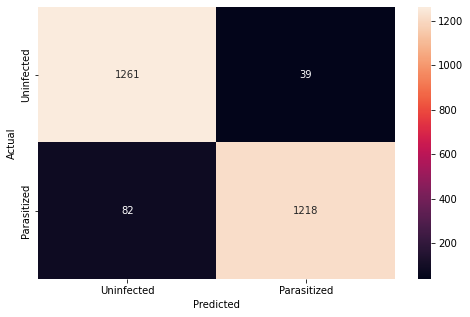

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Use the model to run a prediction on the testing images
pred2 = model2.predict(test_images)
pred2 = np.argmax(pred2, axis = 1) 
y_true = np.argmax(test_labels_encoded, axis = 1)

# Print the classification report
print(classification_report(y_true, pred2))

# Plot the heatmap using the confusion matrix
cm = confusion_matrix(y_true, pred2)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
# Evaluate the accuracy of the new model using the testing data
accuracy2 = model2.evaluate(test_images, test_labels_encoded, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy2[1])

82/82 [==============================] - 1s 7ms/step - loss: 0.1446 - accuracy: 0.9535

 Test_Accuracy:- 0.9534615278244019


<b>Plotting the train and validation accuracy

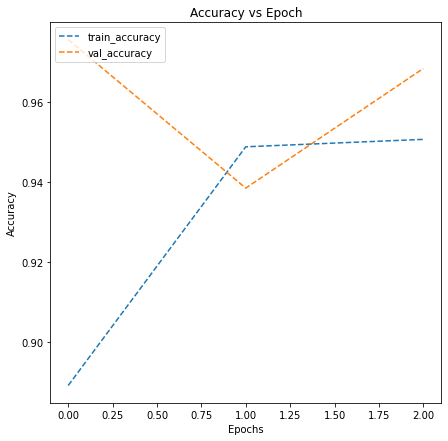

In [ ]:
# Plot the accuracy of the new model against the number of epochs
plot_accuracy(history2)

**Observations:**
- This time around we acheived **95% accuracy within only 5 epochs.**
- This model fit the training data much more quickly with no real change in the accuracy on the training and testing data.

###<b>Adjusting our Model: Model 3 using Data Augmentation

Can we improve the model with Image Data Augmentation? Let's run models using the preprocessed images that we created earlier with OpenCV.
* References to image data augmentation can be seen below:
  *   [Image Augmentation for Computer Vision](https://www.mygreatlearning.com/blog/understanding-data-augmentation/)
  *   [How to Configure Image Data Augmentation in Keras?](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/)





In [ ]:
# Clear the backend
from tensorflow.keras import backend
backend.clear_session()
# Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

####<b> Using image data generator

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Obtain training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_images_normal, train_labels_encoded, test_size=0.2, random_state=42)

# Use ImageDataGenerator to generate images
train_datagen = ImageDataGenerator(horizontal_flip=True, zoom_range = 0.5, rotation_range=30)
val_datagen  = ImageDataGenerator()

# Flowing training images using train_datagen generator
train_generator = train_datagen.flow(x = X_train, y = y_train, batch_size=64, seed=42, shuffle=True)     

# Flowing validation images using val_datagen generator
val_generator =  val_datagen.flow(x= X_val, y = y_val, batch_size=64, seed=42, shuffle=True)

####**Future Exploration:**<br>

*  Check if the performance of the model can be improved by changing different parameters in the ImageDataGenerator.



####<B>Visualizing Augmented images

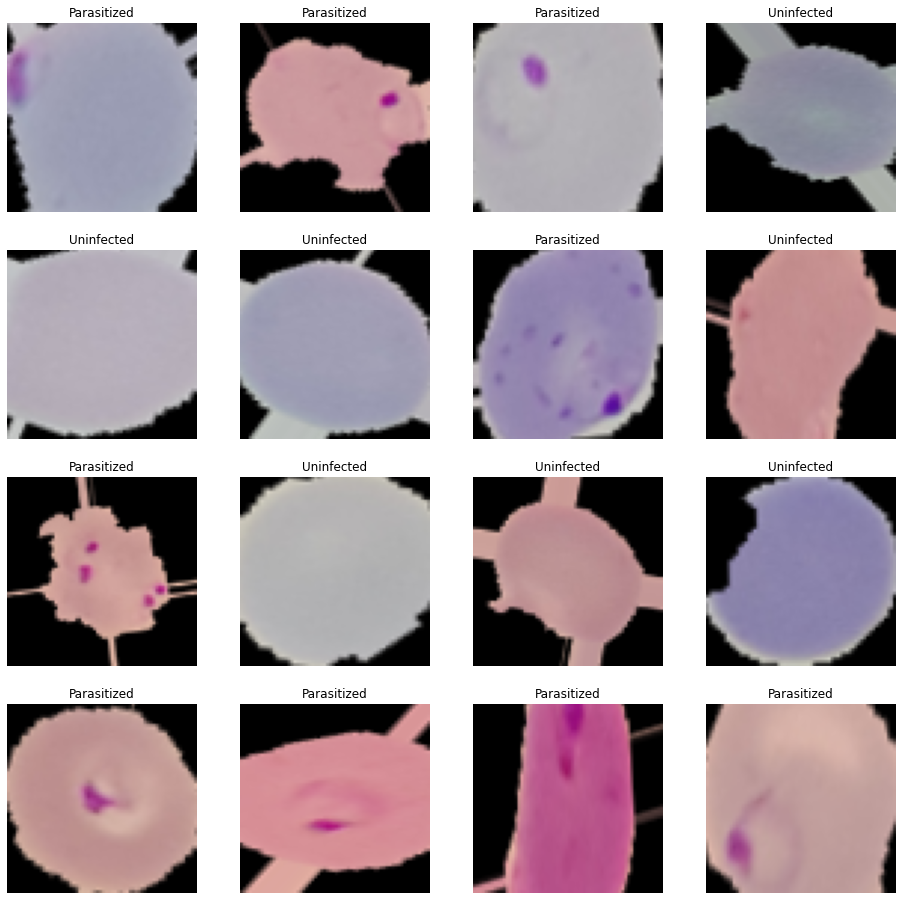

In [ ]:
# Create an iterable for images and labels from the training data
images, labels = next(train_generator)

# Plot 16 images from the training data
fig, axes = plt.subplots(4, 4, figsize = (16, 8))
fig.set_size_inches(16, 16)
for (image, label, ax) in zip(images, labels, axes.flatten()):
    ax.imshow(image)
    if label[1] == 1: 
        ax.set_title('Parasitized')
    else:
        ax.set_title('Uninfected')
    ax.axis('off')

**Observations:**
- We can see that the Image Generator has created a variety of manipulations on top of the original image set.
- Some of the cells are distorted, and in some cases extra lines or color changes have been added.
- There are also likely flipped images mixed in as well.

####<b>Building the Model

In [ ]:
# Create a sequential model
model3 = Sequential()
# Add a convolutional input layer with 32 neurons and a RELU activation function
model3.add(Conv2D(filters=32, kernel_size=2, padding="same", activation="relu", input_shape=(64,64,3)))
# Add a Max Pooling layer
model3.add(MaxPooling2D(pool_size=2))
# Set a 20% neuron dropout to avoid overfitting
model3.add(Dropout(0.2))
# Add a convolutional layer with 32 neurons and a RELU activation function
model3.add(Conv2D(filters=32, kernel_size=2, padding="same", activation="relu"))
# Add a Max Pooling layer
model3.add(MaxPooling2D(pool_size=2))
# Set a 20% neuron dropout to avoid overfitting
model3.add(Dropout(0.2))
# Add a convolutional layer with 32 neurons and a RELU activation function
model3.add(Conv2D(filters=32, kernel_size=2, padding="same", activation="relu"))
# Add a Max Pooling layer
model3.add(MaxPooling2D(pool_size=2))
# Set a 20% neuron dropout to avoid overfitting
model3.add(Dropout(0.2))
# Add a convolutional layer with 32 neurons and a RELU activation function
model3.add(Conv2D(filters=32, kernel_size=2, padding="same", activation="relu"))
# Add a Max Pooling layer
model3.add(MaxPooling2D(pool_size=2))
# Set a 20% neuron dropout to avoid overfitting
model3.add(Dropout(0.2))
# Add a convolutional layer with 32 neurons and a RELU activation function
model3.add(Conv2D(filters=32, kernel_size=2, padding="same", activation="relu"))
# Add a Max Pooling layer
model3.add(MaxPooling2D(pool_size=2))
# Set a 20% neuron dropout to avoid overfitting
model3.add(Dropout(0.2))

# Add a layer to flatten the output thus far
model3.add(Flatten())

# Add a Dense layer with 512 neurons and a RELU activation function
model3.add(Dense(512, activation="relu"))
# Add a 40% dropout to avoid overfitting
model3.add(Dropout(0.4))
# Add a Dense output layer with 2 categories of output using the softmax activation function
model3.add(Dense(2, activation="softmax"))

# Print the model summary
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4128      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        4

####<b>Compiling the model

In [ ]:
# Compile the model using binary crossentropy and the adam optimizer and accuracy metric
model3.compile(loss="binary_crossentropy", optimizer='adam', metrics = ['accuracy'])

<b>Using Callbacks

In [ ]:
# Set up callbacks for early stopping and checkpoints while monitoring the validation loss
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

<b> Fit and Train the model

In [ ]:
# Fit the model using the generated images
history3 = model3.fit(train_generator, 
                      validation_data=val_generator,
                      batch_size=32,
                      callbacks=callbacks,
                      epochs=20,
                      verbose=1)

Epoch 1/20
312/312 [==============================] - 33s 102ms/step - loss: 0.5908 - accuracy: 0.6701 - val_loss: 0.2225 - val_accuracy: 0.9341
Epoch 2/20
312/312 [==============================] - 32s 101ms/step - loss: 0.2739 - accuracy: 0.8991 - val_loss: 0.1673 - val_accuracy: 0.9579
Epoch 3/20
312/312 [==============================] - 31s 101ms/step - loss: 0.2492 - accuracy: 0.9129 - val_loss: 0.1481 - val_accuracy: 0.9593
Epoch 4/20
312/312 [==============================] - 32s 102ms/step - loss: 0.2402 - accuracy: 0.9173 - val_loss: 0.1388 - val_accuracy: 0.9595
Epoch 5/20
312/312 [==============================] - 32s 101ms/step - loss: 0.2307 - accuracy: 0.9197 - val_loss: 0.1330 - val_accuracy: 0.9595
Epoch 6/20
312/312 [==============================] - 32s 102ms/step - loss: 0.2332 - accuracy: 0.9218 - val_loss: 0.1350 - val_accuracy: 0.9593
Epoch 7/20
312/312 [==============================] - 32s 104ms/step - loss: 0.2237 - accuracy: 0.9242 - val_loss: 0.1318 - val_ac

####<B>Evaluating the model

<b>Plot the train and validation accuracy

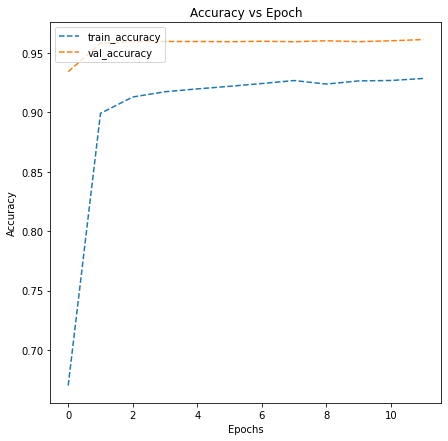

In [ ]:
# Plot the accuracies
plot_accuracy(history3)

In [ ]:
# Evaluate the accuracy of the new model using the testing data
accuracy3 = model3.evaluate(test_images, test_labels_encoded, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy3[1])

82/82 [==============================] - 1s 6ms/step - loss: 22.2434 - accuracy: 0.9462

 Test_Accuracy:- 0.9461538195610046


<B>Plotting the classification report and confusion matrix

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1300
           1       0.94      0.95      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



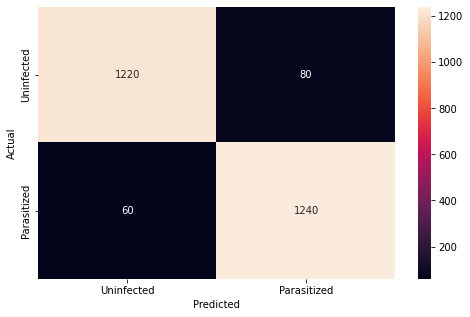

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Use the model to run a prediction on the testing images
pred3 = model3.predict(test_images)
pred3 = np.argmax(pred3, axis = 1) 
y_true = np.argmax(test_labels_encoded, axis = 1)

# Print the classification report
print(classification_report(y_true, pred3))

# Plot the heatmap using the confusion matrix
cm = confusion_matrix(y_true, pred3)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations:**
- We see an accuracy of 95% and a recall rate of 94% for the `Parasitized` class.

###**Adjusting our Model: Model 4 using a Pre-trained model (VGG16)**

<b> Now let us try to use a pretrained model like VGG16 and check how it performs on our data.

In [ ]:
# Clear the backend
from tensorflow.keras import backend
backend.clear_session()
# Fix the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model

vgg = VGG16(include_top=False, weights='imagenet', input_shape=(64, 64, 3))
vgg.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
______________________________________________________________

In [ ]:
transfer_layer = vgg.get_layer('block5_pool')
vgg.trainable=False

# Add classification layers on top of it  
 
x = Flatten()(transfer_layer.output) #Flatten the output from the 3rd block of the VGG16 model
x = Dense(256, activation='relu')(x)

# Similarly add a dense layer with 128 neurons
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)

# Add a dense layer with 64 neurons
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)

x = BatchNormalization()(x)
pred4 = Dense(2, activation='softmax')(x)

model4 = Model(vgg.input, pred4) #Initializing the model

####<b>Compiling the model

In [ ]:
# Compile the model using binary crossentropy and the adam optimizer and accuracy metric
model4.compile(loss="binary_crossentropy", optimizer='adam', metrics = ['accuracy'])

<b> using callbacks

In [ ]:
# Set up callbacks for early stopping and checkpoints while monitoring the validation loss
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

<b>Fit and Train the model

In [ ]:
# Fit the model using 10 epochs
history4 = model4.fit(train_images,
                      train_labels_encoded,
                      batch_size=32,
                      callbacks=callbacks,
                      validation_split=0.2,
                      epochs=10,
                      verbose=1)

Epoch 1/10
624/624 [==============================] - 30s 45ms/step - loss: 0.2204 - accuracy: 0.9209 - val_loss: 0.4218 - val_accuracy: 0.8281
Epoch 2/10
624/624 [==============================] - 27s 43ms/step - loss: 0.1757 - accuracy: 0.9357 - val_loss: 0.2959 - val_accuracy: 0.8802
Epoch 3/10
624/624 [==============================] - 26s 42ms/step - loss: 0.1605 - accuracy: 0.9423 - val_loss: 0.1629 - val_accuracy: 0.9409
Epoch 4/10
624/624 [==============================] - 26s 42ms/step - loss: 0.1544 - accuracy: 0.9452 - val_loss: 0.1995 - val_accuracy: 0.9259
Epoch 5/10
624/624 [==============================] - 27s 43ms/step - loss: 0.1401 - accuracy: 0.9494 - val_loss: 0.1547 - val_accuracy: 0.9431
Epoch 6/10
624/624 [==============================] - 26s 42ms/step - loss: 0.1360 - accuracy: 0.9510 - val_loss: 0.2339 - val_accuracy: 0.9091
Epoch 7/10
624/624 [==============================] - 27s 43ms/step - loss: 0.1304 - accuracy: 0.9546 - val_loss: 0.2475 - val_accuracy:

<b>Plot the train and validation accuracy

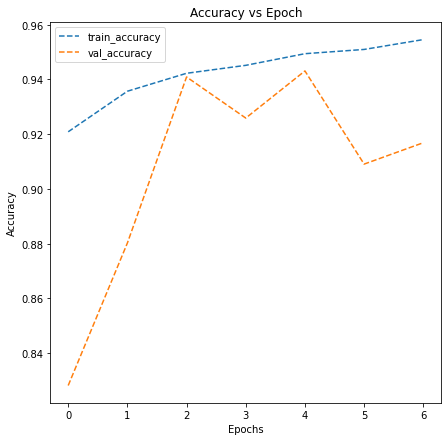

In [ ]:
# Plot the accuracies
plot_accuracy(history4)

**Observations:**
- We can see some strange behaviour from the validation data both in the early and late epochs.
- We still obtain a validation accuracy of 94%, however there are some large fluctuations along the way.

####<b> Evaluating the model

In [ ]:
# Evaluate the accuracy of the new model using the testing data
accuracy4 = model4.evaluate(test_images, test_labels_encoded, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy4[1])

82/82 [==============================] - 4s 40ms/step - loss: 0.1758 - accuracy: 0.9369

 Test_Accuracy:- 0.936923086643219


<b>Plotting the classification report and confusion matrix

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1300
           1       0.92      0.96      0.94      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



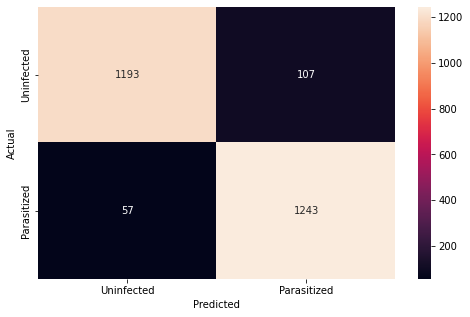

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Use the model to run a prediction on the testing images
pred4 = model4.predict(test_images)
pred4 = np.argmax(pred4, axis = 1) 
y_true = np.argmax(test_labels_encoded, axis = 1)

# Print the classification report
print(classification_report(y_true, pred4))

# Plot the heatmap using the confusion matrix
cm = confusion_matrix(y_true, pred4)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

####<b>Think about it:</b>
*  What observations and insights can be drawn from the confusion matrix and classification report?
*  Choosw the model with the best accuracy scores from all the above models and save it as a final model.


In [ ]:
# This may change depending on modifications to each model, as well as after runtime if using GPUs in the notebook
final_model = model2

###Observations and Conclusions drawn from the final model:

- Each of the models we have created thus far have performed exceptionally well, so really any of them could be a useful choice.
- Overall I chose to use the second adjusted model (**MODEL 2**) as it had the best accuracy, and it also fit much faster than the original model.
- Since the recall rates on each model were very similar, I chose the model with the highest test accuracy.



**Improvements that can be done:**<br>


*  We can potentially improve the models performance by using other pre-trained models or different CNN architectures.
*  We can explore different filter sizes as well as higher image resolution in our CNN model.
*  We can also tune hyperparameters further, utilize more computational power, and allow the model to train for a longer period of time with more refined image data.

###<b>Insights

**1.  What are the most meaningful insights from the data relevant to the problem?**
- There are many forms of cells included in the training data. This will only help train the model for accurate results in the field, where variations are common.
- The provided data is perfectly balanced between both parasitized and healthy RBCs.
- The models were able to train well on the data supplied. Even the original model using non-modified image data was able to acheive accurate and precise results.

**2.  Comparison of various techniques and their relative performance:** How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?
- While each of the models performed well, the image data is relatively clean.  As we saw with the model in which we applied an image generation algorithm, modifications to these images (which can mimic real world human or computer error) can cause the validation accuracy to fluctuate and potentially fit a poor model.
- The base CNN model that we created performed well even with a simple design.
- We see in the final model that after some minor adjustments to the base model, we can not only improve the overall accuracy of the model, but significantly reduce training time by utilizing the BatchNormalization layers.
- We also see that utilizing transfer learning techniques in this situation may not be the most beneficial method. There were many large fluctuations in the validation accuracy, which suggest some instability with this method.

**3.  Proposal for the final solution design:** What model do you propose to be adopted? Why is this the best solution to adopt?
- Given the current image set, any of these models could be an appropriate choice.  Overall we chose the second adjusted model, but given outside data it very well may be the case that other models perform better.
- The LeakyRELU activation function combined with the BatchNormalization layers significantly reduced the training time for the final model.
- This reduction in training time could save a lot of money and time when moving on to use a more expensive computational system to refine the model further.

**4.  Key recommendations for implementation:** What are some key recommendations to implement the solutions? What should the implementation roadmap look like? What further analysis needs to be done or what other associated problems need to be solved?
- Some further experiments involving the preprocessed image data (HSV, and Blur) may help improve our final model. As far as future implementation is concerned, any improvement to the 95% accuracy and recall rate would be a positive step.  Perhaps we can run a few of these models over again without using callbacks to see if the models can be improved over more epochs.  There are many directions we can take the current state of this project.
- There are also risks involved with using this type of model to form a diagnosis. Even with 95% accuracy, that leaves a 5% chance of a misdiagnosis.  Future work to close this gap will be greatly beneficial at reducing any financial risk involved.

#Conclusion

**Executive summary:**
- Malaria is an extremely infectious disease that can be fatal if left unchecked.
- Our goal was to provide an accurate, and quickly trainable model to determine if a supplied Red Blood Cell (RBC) image is parasitized with Malaria.
- For our final model, we wanted an accuracy, precision, and recall rate of at least 95\% as well as reasonable training time. We also want it to be the best of the models that we construct.
- The benefits of having this model would be significant, as manual review of blood samples can take even experienced specialists hours to complete and give a diagnosis.
- Having a reliable model could not only save these specialists time in the lab, but reduce overall cost for the patient and the hospital.
- To implement a model with good performance we explore various methods of image alteration, Convolutional Neural Network construction, as well as various techniques and modifications to a base model.
- After applying various methods and exploring how each method performed, we determined a useful model that not only achieves the 95\% metrics that we were looking for, but also trains very quickly.
- Using this model, we can quickly and accurately determine if an RBC image is parasitized with Malaria.
- Using this model as a baseline for future exploration, we can potentially improve the performance further by tuning hyperparameters, or using higher resolution images.
- This final model can help reduce expensive lab time spent by providing a very accurate method for determining if a patient has Malaria. 



**Problem Summary and Solution:**
- Malaria is an extremely infectious disease that can be fatal for the patient, and can cost many hours of dedicated lab time by specialists to form a diagnosis.
- Our goal was to construct a high performing model, with accuracy, precision, and recall rate of at least 95\% that can determine if an image of a RBC is parasitized with Malaria or not.
- We approached this problem in many different ways. Image preprocessing and Neural Network construction were the primary directions used in finding a good solution.
- After obtaining a final model, we can then use it as a new baseline to train a more accurate model in the future given more computational power, training sample size, and training time while further tuning hyperparameters and slightly modifying the structure of the Neural Network.
- Our final model uses a LeakyRELU activation function for each of the layers of the neural network. We also add BatchNormalization layers which have significantly increased the training speed in relation to the other models tested.
- Overall our final model is accurate, precise, and has a high recall rate, which follows with our goal. The significant decrease in training time will also play a big role in the future when we have more computational resources to further fine tune the model.



**Steps to implement the model:**
- The benefits of using this model could not only save the time of the specialists that have to manually review the blood samples, it could also save the patients and hospital a significant amount of money long term.  The current cost of obtaining an improved model would heavily depend on the hardware used as well as time spent further investigating model construction. However I believe this will be negligible in relation to the overall time and monetary savings from reducing the amount of manual blood sample reviews.
- There are many ways we could explore in the future to improve on the models already created, even exploring new methods entirely.
- We can potentially further tune the model's hyperparameters to increase performance, for example by adding more layers, allowing more training time, or supplying more training data with plenty of image variations.
- We can also train the model using larger image sizes. In this evaluation, we used images of size 64$\times$64 due to hardware limitations. Higher definition images could allow to train a more accurate model, given that we have access to faster hardware in the future.
- We could also experiment in the future with different customized layers as well as changing the size of the filter for the CNN. This might be more expensive in terms of hardware and model training time, but it could prove beneficial to the model's performance.